# Downloading data

In [ ]:
!git clone https://github.com/kevinwang09/pyProj
# !git pull https://github.com/kevinwang09/pyProj

Cloning into 'pyProj'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 17 (delta 4), reused 10 (delta 3), pack-reused 0
Unpacking objects: 100% (17/17), done.


In [ ]:
!pwd
!ls

/content
pyProj	sample_data


# Loading data and libraries

In [ ]:
# Import necessary modules
import numpy as np
import pandas as pd
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder

In [ ]:
penguins = pd.read_csv("pyProj/intro_keras/penguins.csv")
print(penguins.loc[range(5),:])
penguins.describe()

  species     island  bill_length_mm  ...  body_mass_g     sex  year
0  Adelie  Torgersen            39.1  ...       3750.0    male  2007
1  Adelie  Torgersen            39.5  ...       3800.0  female  2007
2  Adelie  Torgersen            40.3  ...       3250.0  female  2007
3  Adelie  Torgersen             NaN  ...          NaN     NaN  2007
4  Adelie  Torgersen            36.7  ...       3450.0  female  2007

[5 rows x 8 columns]


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


# Cleaning data into numpy arrays

In [ ]:
penguins = penguins.dropna()

In [ ]:
predictors = penguins.drop(["species"], axis = 1)
predictors = np.array(pd.get_dummies(data = predictors, columns = ["island", "sex"]))
# predictors = np.asarray(predictors).astype(np.float32)
print(predictors)
print(type(predictors))
predictors.shape

[[ 39.1  18.7 181.  ...   1.    0.    1. ]
 [ 39.5  17.4 186.  ...   1.    1.    0. ]
 [ 40.3  18.  195.  ...   1.    1.    0. ]
 ...
 [ 49.6  18.2 193.  ...   0.    0.    1. ]
 [ 50.8  19.  210.  ...   0.    0.    1. ]
 [ 50.2  18.7 198.  ...   0.    1.    0. ]]
<class 'numpy.ndarray'>


(333, 10)

In [ ]:
predictors = np.array(predictors)
from sklearn.preprocessing import StandardScaler

predictors = StandardScaler().fit_transform(predictors)

In [ ]:
target = np.array(pd.get_dummies(penguins["species"]))
# target = np.asarray(target).astype(np.float32)
print(target[range(5),:])
print(type(target))
print(target.shape)

[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]]
<class 'numpy.ndarray'>
(333, 3)


# Making Keras model


In [ ]:
ncols = predictors.shape[1]
print(ncols)

10


In [ ]:
from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience = 2)

In [ ]:
model = Sequential()
model.add(Dense(100, activation = "relu", input_shape = (ncols, )))
model.add(Dense(100, activation = "relu"))
model.add(Dense(3, activation = "softmax"))
model.compile(optimizer = "sgd", loss = "categorical_crossentropy", metrics = ["accuracy"])
hist = model.fit(predictors, target, epochs = 30 , validation_split = 0.3, callbacks = [early_stopping_monitor])

Epoch 1/30
8/8 [==============================] - 0s 18ms/step - loss: 0.9944 - accuracy: 0.5408 - val_loss: 1.3266 - val_accuracy: 0.0000e+00
Epoch 2/30
8/8 [==============================] - 0s 4ms/step - loss: 0.8507 - accuracy: 0.7682 - val_loss: 1.3745 - val_accuracy: 0.1100
Epoch 3/30
8/8 [==============================] - 0s 4ms/step - loss: 0.7360 - accuracy: 0.9142 - val_loss: 1.4211 - val_accuracy: 0.1300


# Resubstitution error

In [ ]:
predictions = model.predict(predictors)
print(predictions[[1, 100, 200, 300], :])

[[0.5258234  0.09776455 0.37641206]
 [0.42227143 0.23686737 0.34086123]
 [0.19875337 0.14433728 0.65690935]
 [0.38306364 0.2631187  0.35381767]]


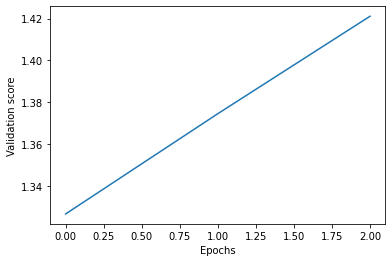

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history["val_loss"])
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

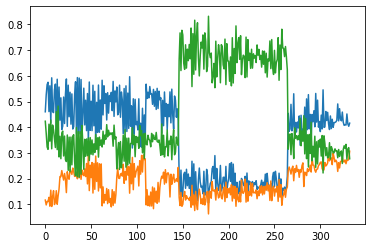

In [61]:
plt.plot(predictions)
plt.show()